# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [212]:
df_k = df.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)
df_k.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [213]:
means = np.mean(df_k)
std_dev = np.std(df_k)
df_k = (df_k - means) / std_dev
df_k.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [0]:
pca = PCA(30)
pca.fit(df_k)
B = pca.transform(df_k)
y = pca.explained_variance_ratio_

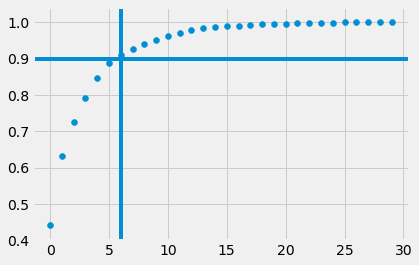

In [215]:
x = range(30)
plt.scatter(x, y.cumsum())
plt.axhline(.9)
plt.axvline(6)

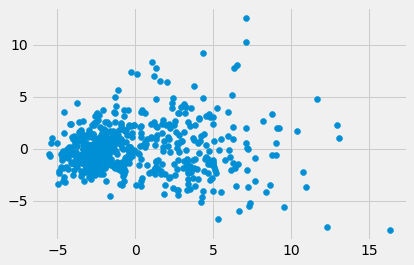

In [216]:
X = B[:,0]
Y = B[:,1]
plt.scatter(X, Y)

In [217]:
dataset_centroid_x = X.mean()
dataset_centroid_y = Y.mean()

print(dataset_centroid_x, dataset_centroid_y)

-4.9950280194031645e-17 3.121892512126978e-17


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


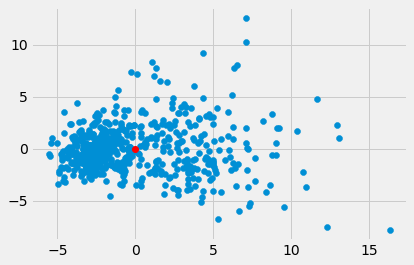

In [218]:
plt.scatter(X, Y)
plt.subplot(1, 1, 1)
plt.plot(dataset_centroid_x, dataset_centroid_y, 'or')
plt.show();

In [219]:
pca = PCA(2)
pca.fit(df_k)
B = pca.transform(df_k)
points = pd.DataFrame(B, columns=['x', 'y'])
points.head()

,x,y
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [220]:
centroids = points.sample(2)
centroids.head()

,x,y
33,4.990603,-1.132589
11,2.651100,0.066568


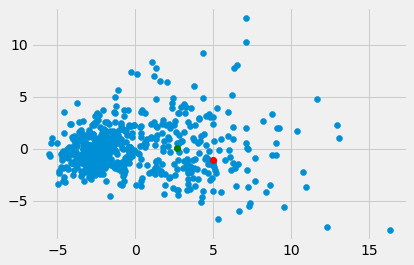

In [221]:
ax = plt.subplot(1, 1, 1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, 'or')
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, 'og')
plt.show()

In [0]:
import math
from scipy.spatial import distance

# Get the nearest centroid to each data point
def find_nearest_centroid(df_k, centroids, iteration):
  
  # Calc the distances between each point and centroid
  distances = distance.cdist(df_k, centroids, 'euclidean')
  
  # Get the nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)
  
  se = pd.Series(nearest_centroids)
  df_k['cluster_'+iteration] = se.values
  
  return df_k

In [223]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,1
4,3.935302,-1.948072,0


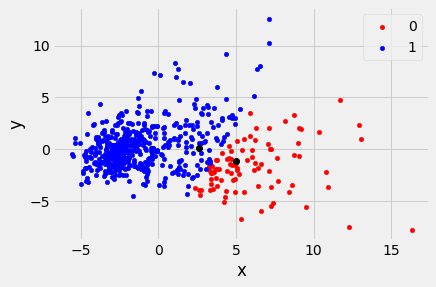

In [224]:
def plot_clusters(df_k, column_header, centroids):
  colors = {0:'red', 1:'blue'}
  plt.style.use('fivethirtyeight')
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, 'ok')
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, 'ok')
  grouped = df_k.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
def get_centroids(df_k, column_header):
  new_centroids = df_k.groupby(column_header).mean()
  return new_centroids

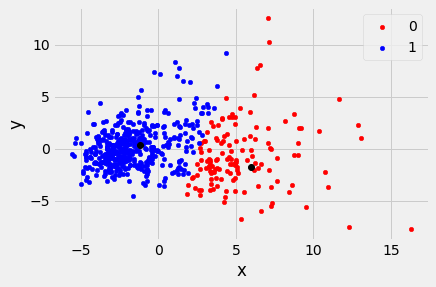

In [226]:
# calc new centroids
centroids = get_centroids(first_pass, 'cluster_1')

# get clusters for new centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot new clusters
plot_clusters(second_pass, 'cluster_2', centroids)

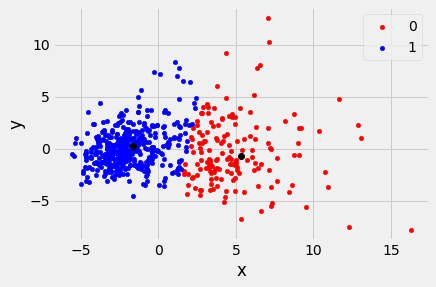

In [227]:
# calc new centroids
centroids = get_centroids(second_pass, 'cluster_2')

# get clusters for new centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot new clusters
plot_clusters(third_pass, 'cluster_3', centroids)

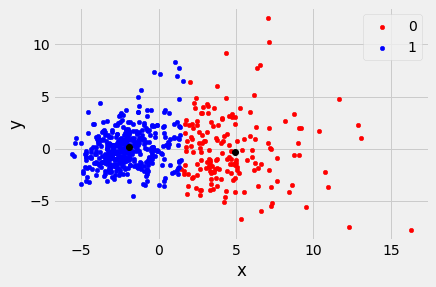

In [228]:
# calc new centroids
centroids = get_centroids(third_pass, 'cluster_3')

# get clusters for new centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot new clusters
plot_clusters(fourth_pass, 'cluster_4', centroids)

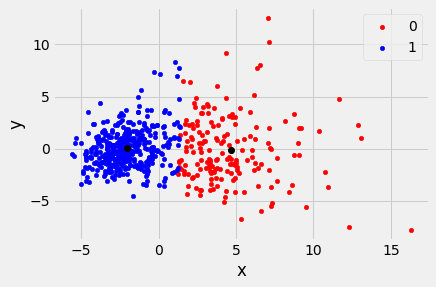

In [229]:
# calc new centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# get clusters for new centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot new clusters
plot_clusters(fifth_pass, 'cluster_5', centroids)

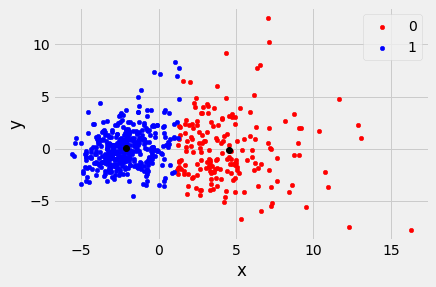

In [230]:
# calc new centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# get clusters for new centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot new clusters
plot_clusters(sixth_pass, 'cluster_6', centroids)

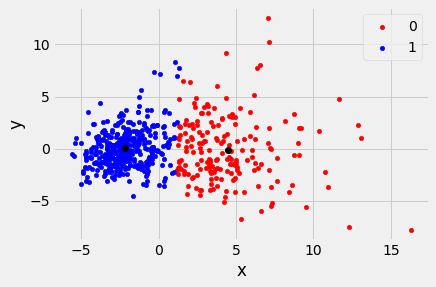

In [231]:
# calc new centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# get clusters for new centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot new clusters
plot_clusters(seventh_pass, 'cluster_7', centroids)

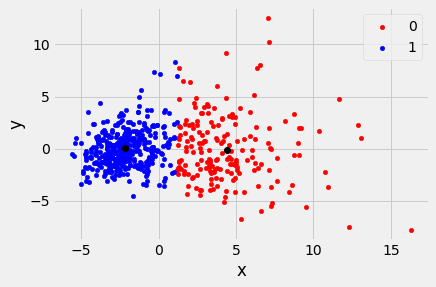

In [232]:
# calc new centroids
centroids = get_centroids(seventh_pass, 'cluster_7')

# get clusters for new centroids
eighth_pass = find_nearest_centroid(seventh_pass.select_dtypes(exclude='int64'), centroids, '8')

# Plot new clusters
plot_clusters(eighth_pass, 'cluster_8', centroids)

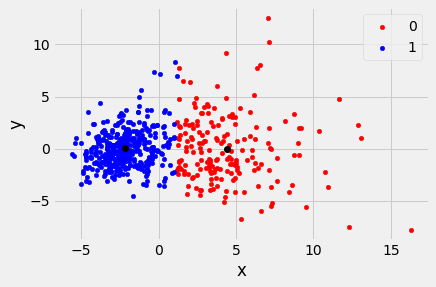

In [233]:
# calc new centroids
centroids = get_centroids(eighth_pass, 'cluster_8')

# get clusters for new centroids
ninth_pass = find_nearest_centroid(eighth_pass.select_dtypes(exclude='int64'), centroids, '9')

# Plot new clusters
plot_clusters(ninth_pass, 'cluster_9', centroids)

In [234]:
convergence = np.array_equal(eighth_pass['cluster_8'], ninth_pass['cluster_9'])
convergence

False

# Time to try this the quick and easy way

In [235]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(df_k)
labels = kmeans.labels_

print(labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 

In [236]:
label_series = pd.Series(labels)
points['cluster'] = label_series
points.head()

,x,y,cluster
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


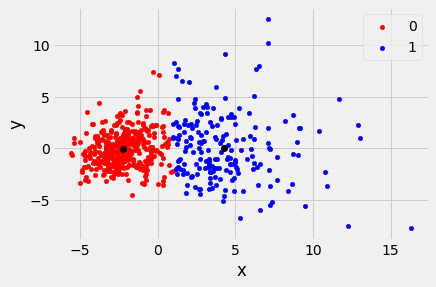

In [237]:
centroids = get_centroids(points, 'cluster')
plot_clusters(points, 'cluster', centroids)

# How about in 6 dimensions?

In [238]:
pca = PCA(6)
pca.fit(df_k)
B = pca.transform(df_k)
points = pd.DataFrame(B, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
points.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


In [0]:
kmeans = KMeans(2)
kmeans.fit(df_k)
labels = kmeans.labels_

In [240]:
label_series = pd.Series(labels)
points['cluster'] = label_series
points.head(), points.shape, df_k.shape

(        PC1        PC2       PC3       PC4       PC5       PC6  cluster
 0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411425        1
 1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656        1
 2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452        1
 3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422        1
 4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495        1,
 (569, 7),
 (569, 30))

In [241]:
df['cluster'] = points['cluster']
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,cluster
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [0]:
# Encode diagnosis with 1 for Malignant and 0 for Benign
df['diagnosis'] = df['diagnosis'].replace({'M':1, 'B':0})

In [243]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [244]:
df['cluster'].value_counts()

0    375
1    194
Name: cluster, dtype: int64

In [266]:
subset = df[df['diagnosis'] == df['cluster']]
subset.shape

(515, 34)

In [271]:
accuracy = subset.shape[0]/df.shape[0]
round(accuracy * 100, 2)

90.51

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.